# **SVM with hyperparameter tuning - Grid Search**

Support Vector Machine (SVM) is a supervised learning algorithm that is primarily used for classification purposes. It works by finding a hyperplane that best separates different groups (known as classes) in a dataset. The hyperplane is selected in such a way that it maximises the margin (margin: the distance between the hyperplane and the nearest data points of each class) and minimises the classification error. SVMs can be used for both linear and nonlinear classification problems by applying kernel functions that map the input data into a higher-dimensional feature space, where a linear hyperplane can be used to separate the classes. SVMs are known for their good performance in high-dimensional feature spaces and their ability to handle complex datasets. 


1. Import/install the necessary packages
2. Get the data from Google Drive
3. Split the data into training and testing sets
4. Robust scaling 
5. Create an SVM classifier
6. Define the hyperparameter grid to search
7. Search the hyperparameter grid using GridSearchCV()
8. Use the best model provided by the grid search to make predictions on the test data
9. Print the confusion matrix and performance metrics (classification report)
10. Display the confusion matrix (heatmap)
11. Display the feature importance plot


**Import/install the necessary packages**

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler

**Get the data from Google Drive**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/customer_loyalty_data.csv") 
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Income                   1000 non-null   int64 
 2   Num_Purchases            1000 non-null   int64 
 3   Average_Rating           1000 non-null   int64 
 4   Customer_Service_Rating  1000 non-null   int64 
 5   Membership_Duration      1000 non-null   int64 
 6   Loyalty                  1000 non-null   object
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None 

   Age  Income  Num_Purchases  Average_Rating  Customer_Service_Rating  \
0   63    4528              1               1                        2   
1   20    2482             14               1                        5   
2   46    1316              1               4                        4   
3   52    3024              4               4                   

**Split the data into training and testing sets**

In [3]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('Loyalty', axis=1), df['Loyalty'], test_size=0.2, random_state=50)

**Robust scaling**

In [4]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Create an SVM classifier**

In [5]:
classifier = svm.SVC()

**Define the hyperparameter grid to search**

In [6]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

**Search the hyperparameter grid using GridSearchCV()**

In [7]:
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

**Use the best model provided by the grid search to make predictions on the test data**

In [8]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

SVC(C=0.01, gamma=0.01, kernel='linear') 



**Print the confusion matrix and performance metrics (classification report)**

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  89]
 [  0 111]]
              precision    recall  f1-score   support

       Loyal       0.00      0.00      0.00        89
   Non-Loyal       0.56      1.00      0.71       111

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.31      0.56      0.40       200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Display the confusion matrix (heatmap)**

<AxesSubplot:>

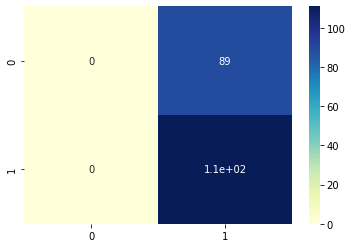

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

**A. Display the feature importance plot**

Age                        0.000224
Income                     0.000134
Num_Purchases              0.000296
Average_Rating             0.070000
Customer_Service_Rating    0.000063
Membership_Duration        0.000169
dtype: float64 

Age                        0.000224
Income                     0.000134
Num_Purchases              0.000296
Average_Rating             0.070000
Customer_Service_Rating    0.000063
Membership_Duration        0.000169
dtype: float64 



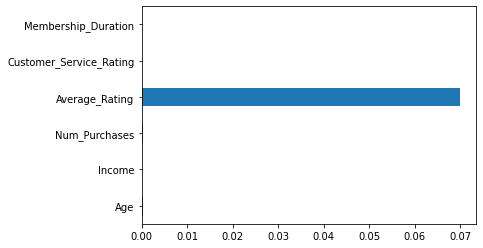

In [13]:
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show()

**B. Display the feature importance plot**

[[2.24378308e-04 1.33690232e-04 2.95565063e-04 7.00000000e-02
  6.28093949e-05 1.68657906e-04]] 

[[2.24378308e-04 1.33690232e-04 2.95565063e-04 7.00000000e-02
  6.28093949e-05 1.68657906e-04]] 



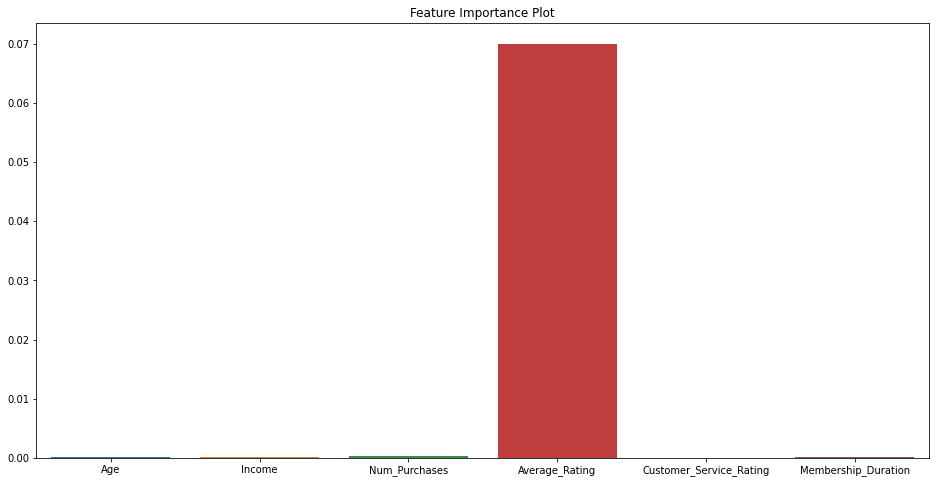

In [14]:
# Print the coefficients of the hyperplane
coefficients = best_classifier.coef_
print(coefficients,'\n')
coefficients = abs(coefficients)
print(coefficients,'\n')
# Display the coefficients
#import matplotlib.pyplot as plt
#%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=X_train.columns, y=coefficients.reshape(-1))
ax.set_title("Feature Importance Plot")
plt.show()

# **Exercise 1**

Use the following hyperparameter snippet for the tuning:

In [15]:
hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'gamma': [0.01, 0.1, 1, 10, 100]}

**Exercise 2**

Use Standardisation instead of Robust scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Exercise 3**

Use Min-max scaling instead of Robust scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)